In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [2]:
data_dir = "../data/FinTSB_cn/"
rise_files = glob(data_dir + "rise/*.pkl")
fall_files = glob(data_dir + "fall/*.pkl")
fluctuation_files = glob(data_dir + "fluctuation/*.pkl")
extreme_files = glob(data_dir + "extreme/*.pkl")

In [3]:
rise_df = pd.concat([pd.read_pickle(f) for f in rise_files])
fall_df = pd.concat([pd.read_pickle(f) for f in fall_files])
fluctuation_df = pd.concat([pd.read_pickle(f) for f in fluctuation_files])
extreme_df = pd.concat([pd.read_pickle(f) for f in extreme_files])

In [4]:
nb_stocks_rise = rise_df.index.get_level_values("instrument").nunique()
nb_stocks_fall = fall_df.index.get_level_values("instrument").nunique()
nb_stocks_fluctuation = fluctuation_df.index.get_level_values("instrument").nunique()
nb_stocks_extreme = extreme_df.index.get_level_values("instrument").nunique()

In [5]:
print("Number of stocks in rise dataset:", nb_stocks_rise)
print("Number of stocks in fall dataset:", nb_stocks_fall)
print("Number of stocks in fluctuation dataset:", nb_stocks_fluctuation)
print("Number of stocks in extreme dataset:", nb_stocks_extreme)

Number of stocks in rise dataset: 1235
Number of stocks in fall dataset: 1298
Number of stocks in fluctuation dataset: 1251
Number of stocks in extreme dataset: 1225


In [6]:
for mov, files in zip(["rise", "fall", "fluctuation", "extreme"], [rise_files, fall_files, fluctuation_files, extreme_files]):
    for i, f in enumerate(files):
        df = pd.read_pickle(f)
        print(f"{mov} - {i}: {df.index.get_level_values('instrument').nunique()} unique stocks")

rise - 0: 300 unique stocks
rise - 1: 300 unique stocks
rise - 2: 300 unique stocks
rise - 3: 300 unique stocks
rise - 4: 300 unique stocks
fall - 0: 300 unique stocks
fall - 1: 300 unique stocks
fall - 2: 300 unique stocks
fall - 3: 300 unique stocks
fall - 4: 300 unique stocks
fluctuation - 0: 300 unique stocks
fluctuation - 1: 300 unique stocks
fluctuation - 2: 300 unique stocks
fluctuation - 3: 300 unique stocks
fluctuation - 4: 300 unique stocks
extreme - 0: 300 unique stocks
extreme - 1: 300 unique stocks
extreme - 2: 300 unique stocks
extreme - 3: 300 unique stocks
extreme - 4: 300 unique stocks


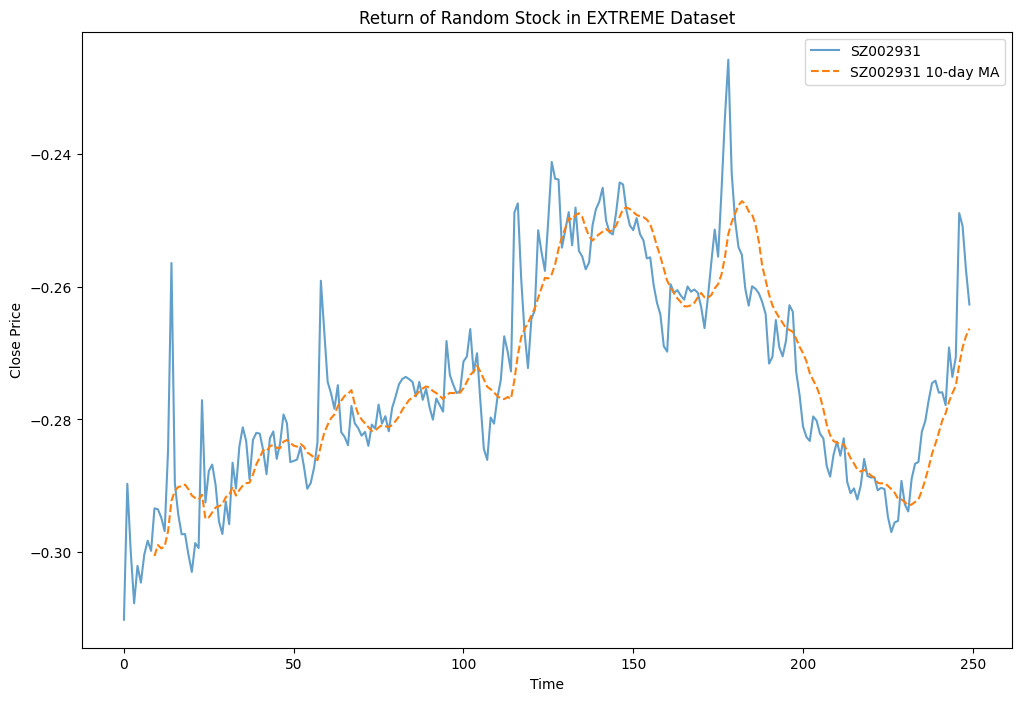

In [ ]:
def plot_stock(df: pd.DataFrame, mov: str):
    random_stocks = np.random.choice(df.index.get_level_values("instrument").unique(), size=1, replace=False)
    fig = plt.figure(figsize=(12, 8))
    for stock in random_stocks:
        stock_data = df.loc[stock][:250]["close"].values
        moving_average = pd.Series(stock_data).rolling(window=10).mean()
        plt.plot(stock_data, label=stock, alpha=0.7)
        plt.plot(moving_average, label=f"{stock} 10-day MA", linestyle='--')
        #plt.hlines(0, xmin=0, xmax=250, colors='red', linestyles='dashed', label='Zero Return')
    plt.title(f"Closing Price of Random Stock in {mov.upper()} Dataset")
    plt.xlabel("Time")
    plt.ylabel("Normalized Closing Price")
    plt.legend()
 
plot_stock(extreme_df, "extreme")